In [264]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes=True)

In [265]:
df = pd.read_csv('feature_engineering.csv', index_col=0)
df.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,...,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,...,f,0.00,24.42,24.42,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,...,f,213.76,38.58,38.58,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,...,f,0.00,29.76,29.76,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,...,f,195.20,30.00,30.00,1,341.58,3,lxidpiddsbxsbosboudacockeimpuepw,20.000,0


---

### Feature engineering

#### Price Differences (Off-peak prices in December and preceding January)

In [266]:
price_df = pd.read_csv('price_data.csv')

In [267]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get Jan and Dec prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [268]:
df = pd.merge(df, diff, on='id')
df.head(5)

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,...,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,...,24.42,24.42,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,...,38.58,38.58,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0,0.050443,1.500000
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,...,29.76,29.76,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.003994,-0.000001
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,...,30.00,30.00,1,341.58,3,lxidpiddsbxsbosboudacockeimpuepw,20.000,0,-0.006171,0.000000


#### Price Changes (Monthly)

In [269]:
# Average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [270]:
 # Mean difference different peak periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - \
                                             mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - \
                                             mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] -\
                                                 mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - \
                                             mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - \
                                             mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - \
                                                 mean_prices['price_mid_peak_fix']

In [271]:
 columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,...,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,...,17.250,0,-0.006192,0.162916,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,...,13.200,0,-0.004104,0.177779,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,...,13.856,0,0.050443,1.500000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,...,13.200,0,-0.003994,-0.000001,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,...,20.000,0,-0.006171,0.000000,0.020534,0.030621,0.051155,16.291555,8.145775,24.437330


Instead of looking at the price changes annually, we are looking at the differences over months along with changes by price levels (off-peak, mid-peak, peak). These features may show patterns at a greater granularity to observe changes between months.

#### Max Price Changes (Monthly)

In [272]:
mean_prices_by_month = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [273]:
 # Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] -\
                                                      mean_prices_by_month['price_peak_var']
mean_prices_by_month['mid_peak_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] -\
                                                      mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] -\
                                                          mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] -\
                                                      mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - \
                                                      mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - \
                                                          mean_prices_by_month['price_mid_peak_fix']

In [274]:
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'mid_peak_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'mid_peak_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [275]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]
df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,...,0.051178,16.280694,8.140345,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,...,0.146426,44.385450,0.000000,44.385450,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,...,0.181558,45.319710,0.000000,45.319710,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,...,0.147926,44.266930,0.000000,44.266930,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,...,0.051155,16.291555,8.145775,24.437330,0.020534,0.030621,0.051155,16.291555,8.145775,24.437330


Customers usually seek low power rates, thus a feature that observes the maximum price over a month can be used to take a look at the energy prices from a customer perspective.

---
#### Customer Loyalty

We are going to convert the start and end date of a customer's time with the company to understand how long they have been loyal.

In [276]:
df.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,...,0.051178,16.280694,8.140345,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,...,0.146426,44.385450,0.000000,44.385450,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,...,0.181558,45.319710,0.000000,45.319710,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,...,0.147926,44.266930,0.000000,44.266930,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,...,0.051155,16.291555,8.145775,24.437330,0.020534,0.030621,0.051155,16.291555,8.145775,24.437330


In [277]:
df['date_activ'] = pd.to_datetime(df['date_activ'], format = '%Y-%m-%d')
df['date_end'] = pd.to_datetime(df['date_end'], format = '%Y-%m-%d')

df['loyalty'] = ((df['date_end']-df['date_activ']) / np.timedelta64(1, 'Y'))
df['loyalty'] = df['loyalty'].round(1)

In [278]:
df.groupby(['loyalty']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
loyalty,
8.4,1.0
8.6,0.5
12.2,0.5
11.5,0.5
9.1,0.5
...,...
9.7,0.0
9.8,0.0
9.9,0.0


We can observe that newer customers are more likely to churn compared to ones that have been with the company for more than a year.

---

### Modelling
We have been tasked with creating a random forest model to predict customer churn. This type of model is a decision tree that are easy to build and simple for binary choices. In general, we need to be cautious about using decision trees since they tend to have low accuracy when introduced to many samples. But since we are only classifying whether a customer will a) churn or b) not churn, we can use random forests to have a general understanding of our overall customer base and their predicted behavior.

#### Prep for Model

First we need to identify variables that can be removed. We do this to eliminate multicollinearity and increase the accuracy of the model.

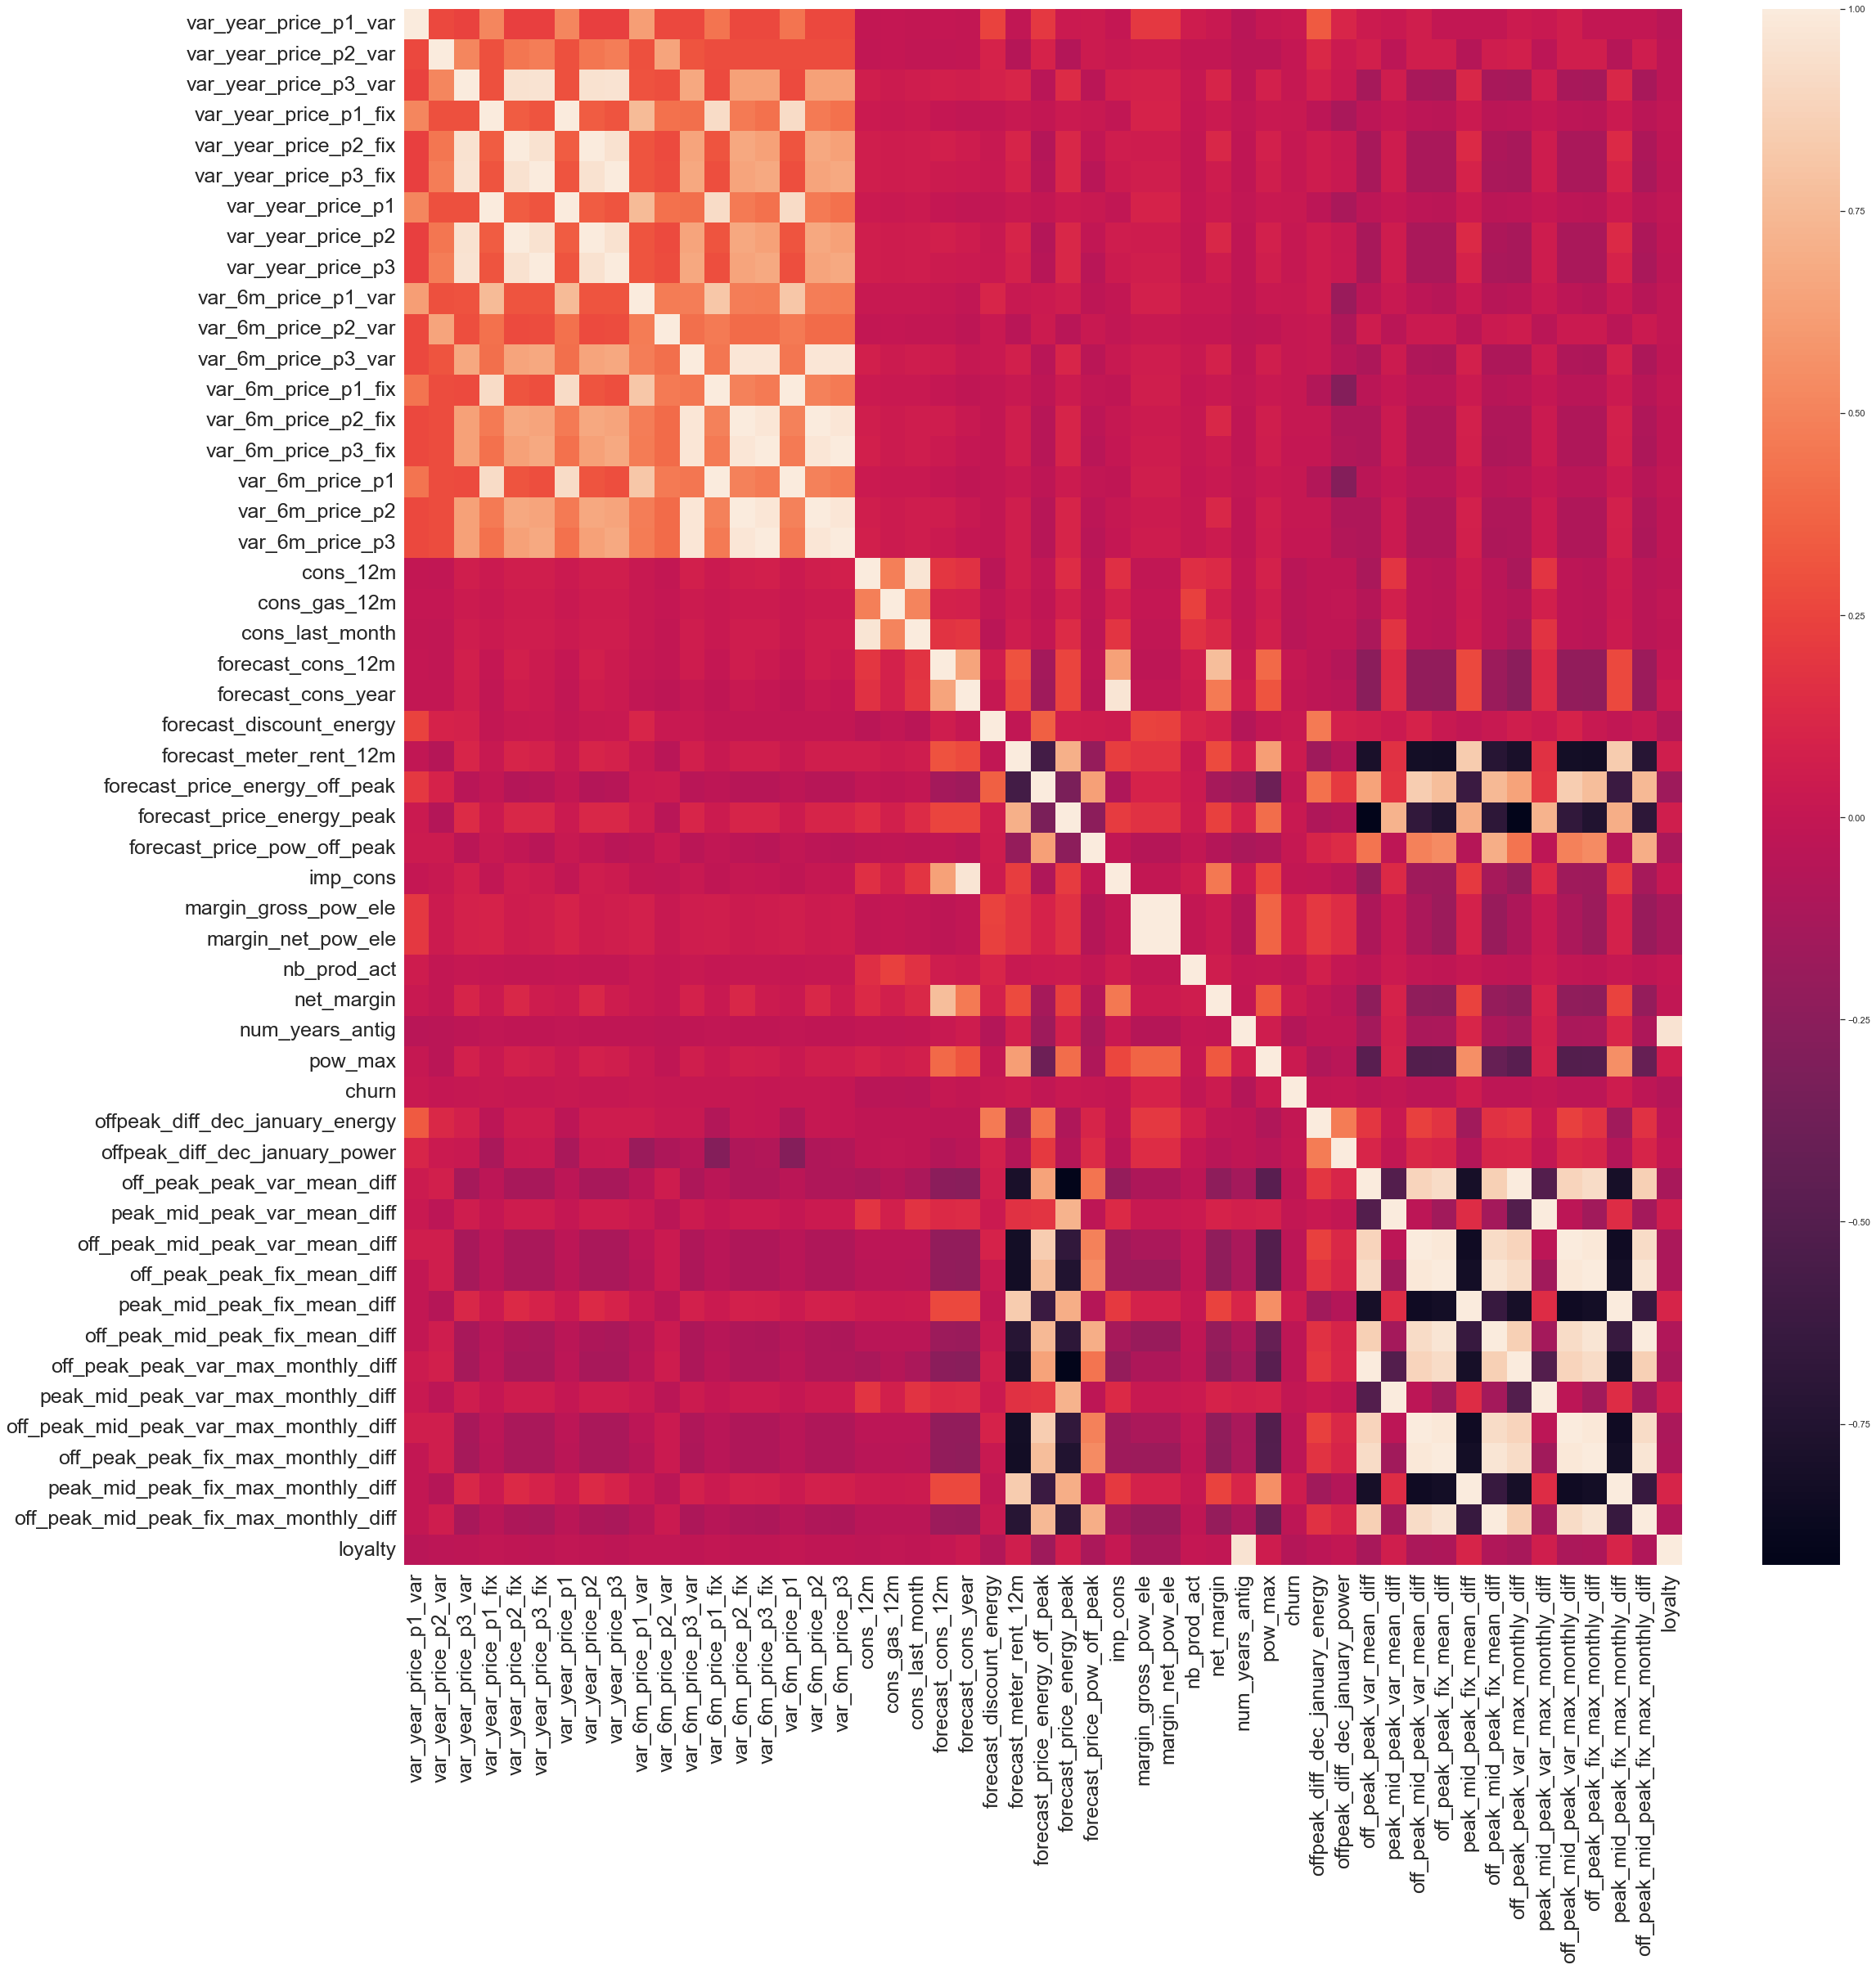

In [279]:
correlation = df.corr()

plt.figure(figsize=(35, 35))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [280]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Since the variable churn is our dependent/predicting variable, we will assign this to y. The rest of the variables will be assigned to X since these are independent.

In [295]:
train_df = df.copy()

y = train_df['churn']
X = train_df.drop(columns=['churn', 'date_end', 'date_activ','date_modif_prod', 'date_renewal', 'has_gas', 'nb_prod_act', 'origin_up', 'id', 'loyalty', 'offpeak_diff_dec_january_energy', 'var_year_price_p1', 'peak_mid_peak_fix_mean_diff', 'var_6m_price_p1_fix', 'channel_sales', 'cons_gas_12m', 'forecast_meter_rent_12m'])

print(y.shape)
print(X.shape)

(14606,)
(14606, 42)


In [296]:
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size= 0.3)

print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(10224,)
(4382,)
(10224, 42)
(4382, 42)


In [297]:
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

#### Model Evaluation

We are going to use the performance metrics:
- Accuracy: correctly predicted observations / total observations
- Precision: true positives among all classified as positive
- Recall: true positives among all that are actually positive

We calculate this by identify the true positives, true negatives, false positives, and false negatives.

In [298]:
prediction = rf_model.predict(X_test)
tn, tp, fn, fp = metrics.confusion_matrix(y_test, prediction).ravel()

In [299]:
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}\n")
print(f"Total Observations: {tn + tp + fn + fp}")

True Negatives (TN): 3953
False Negatives (FN): 392
True Positives (TP): 8
False Positives (FP): 29

Total Observations: 4382


In [300]:
print(f"Accuracy: {metrics.accuracy_score(y_test, prediction).round(4)}")
print(f"Precision: {metrics.precision_score(y_test, prediction).round(4)}")
print(f"Recall: {metrics.recall_score(y_test, prediction).round(4)}")

Accuracy: 0.9087
Precision: 0.7838
Recall: 0.0689


Findings from our random forest model:
- Churn rate was less than 10% within the test set
- While the accuracy was high, the precision and recall scores tell us that 78% actual positive churn results were correct among all predicted positive churn results. Additionally, 7% of the actual positive churn results were correct predicted among the total amount of positive churn results.
- Our model would need to be further improved during the feature engineering process or optimise our model parameters to increase the quality

---

#### Feature Importance

In [301]:
features_importance = pd.DataFrame({
    'features' : X_train.columns,
    'importance' : rf_model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index()

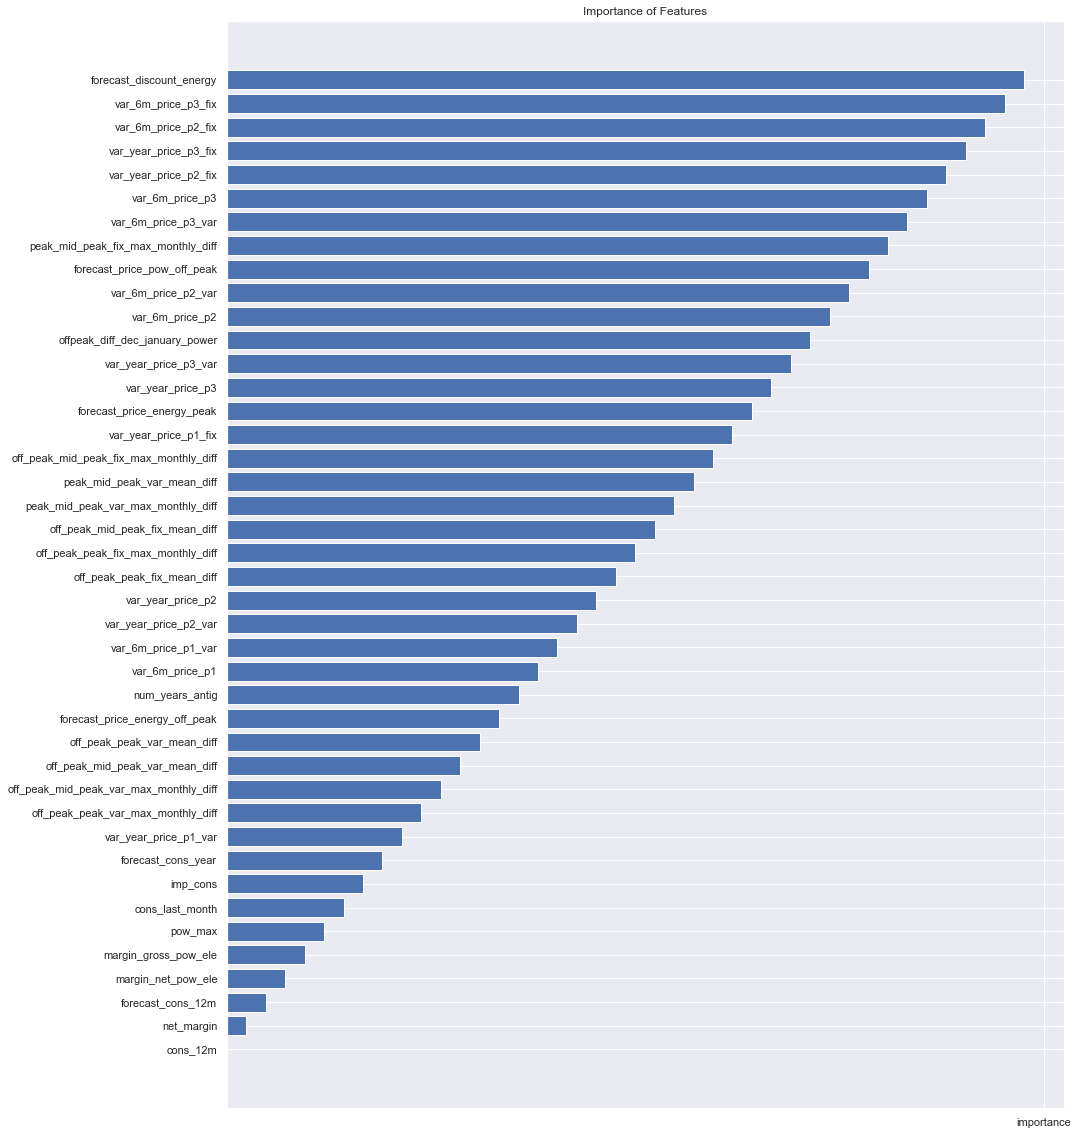

In [302]:
plt.figure(figsize=(15,20))
plt.barh(range(len(features_importance)), features_importance['features'], align='center')
plt.title("Importance of Features")
plt.xticks('importance')
plt.yticks(range(len(features_importance)), features_importance['features'])
plt.show()

The model results and feature importance chart show that the forecast discount of energy is one of the largest influences, in addition to the variable fixed prices within 6 months. The data indicates that customers are influenced to churn in response to price changes.